# [TALLER 05] GAUSS-JACOBI & GAUSS-SEIDEL

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%autoreload 2
from src import gauss_jacobi, gauss_seidel

## EJERCICIO UNO
Resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{aligned}
2x_1 + 10x_2 &= 16, \\
3x_1 + 2x_2 &= 11 \\
\end{aligned}
$$

Primero generamos la matriz ampliada del sistema de ecuaciones, donde:

$$
A=\begin{bmatrix}
2 & 10 & 16 \\
3 & 2 & 11 \\
\end{bmatrix}
$$

## MÉTODO DE GAUSS-JACOBI con X0=(1,1)

In [27]:
A = [[3,2],[2,10]]
b = np.array([11,16],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x, tray_jacobi= gauss_jacobi(A=A, b=b, x0=(1,1), tol=tol, max_iter=max_iter)

[01-25 20:28:02][INFO] i= 0 x: [[1. 1.]]
[01-25 20:28:02][INFO] i= 1 x: [[3.  1.4]]
[01-25 20:28:02][INFO] i= 2 x: [[2.73333333 1.        ]]
[01-25 20:28:02][INFO] i= 3 x: [[3.         1.05333333]]
[01-25 20:28:02][INFO] i= 4 x: [[2.96444444 1.        ]]
[01-25 20:28:02][INFO] i= 5 x: [[3.         1.00711111]]
[01-25 20:28:02][INFO] i= 6 x: [[2.99525926 1.        ]]
[01-25 20:28:02][INFO] i= 7 x: [[3.         1.00094815]]
[01-25 20:28:02][INFO] i= 8 x: [[2.9993679 1.       ]]
[01-25 20:28:02][INFO] i= 9 x: [[3.         1.00012642]]
[01-25 20:28:02][INFO] i= 10 x: [[2.99991572 1.        ]]
[01-25 20:28:02][INFO] i= 11 x: [[3.         1.00001686]]
[01-25 20:28:02][INFO] i= 12 x: [[2.99998876 1.        ]]
[01-25 20:28:02][INFO] i= 13 x: [[3.         1.00000225]]
[01-25 20:28:02][INFO] i= 14 x: [[2.9999985 1.       ]]
[01-25 20:28:02][INFO] i= 15 x: [[3.        1.0000003]]
[01-25 20:28:02][INFO] i= 16 x: [[2.9999998 1.       ]]
[01-25 20:28:02][INFO] i= 17 x: [[3.         1.00000004]]
[01-

### MÉTODO DE GAUSS-SEIDEL X0=(1,1)

In [29]:
A = [[3,2],[2,10]]
b = np.array([11,16],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x, tray_seidel= gauss_seidel(A=A, b=b, x0=(1,1), tol=tol, max_iter=max_iter)

[01-25 20:29:45][INFO] i= 0 x: [[1. 1.]]
[01-25 20:29:45][INFO] i= 1 x: [[3. 1.]]


### GRAFICA con X0=(1,1)

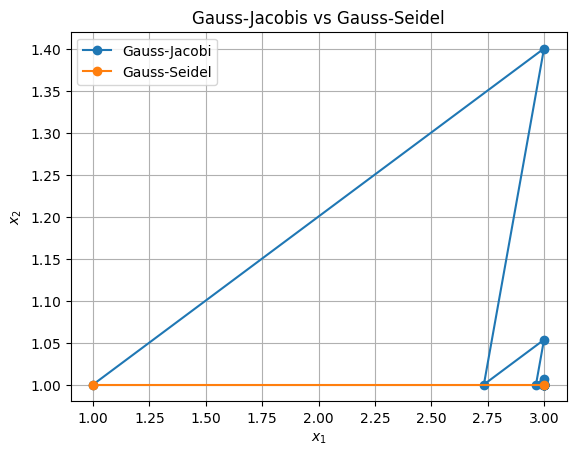

In [40]:
import numpy as np  
import matplotlib.pyplot as plt

tray_jacobi = np.squeeze(np.array(tray_jacobi))
tray_seidel = np.squeeze(np.array(tray_seidel)) 
x1_values_j = tray_jacobi[:, 0]
x2_valuesj_j = tray_jacobi[:, 1]   
x3_values_j = tray_seidel[:, 0]
x4_valuesj_j = tray_seidel[:, 1]

# Graficar la relación entre x1 y x2
plt.plot(x1_values_j, x2_valuesj_j, marker='o', label="Gauss-Jacobi", linestyle='-')
plt.plot(x3_values_j, x4_valuesj_j, marker='o', label="Gauss-Seidel", linestyle='-')


# Personalizar la gráfica
plt.title("Gauss-Jacobis vs Gauss-Seidel")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()
plt.legend()  
plt.show()

## MÉTODO DE GAUSS-JACOBI con X0=(5,-2)

In [45]:
A = [[3,2],[2,10]]
b = np.array([11,16],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x, tray_jacobi= gauss_jacobi(A=A, b=b, x0=(5,-2), tol=tol, max_iter=max_iter)

[01-25 20:40:58][INFO] i= 0 x: [[ 5. -2.]]
[01-25 20:40:58][INFO] i= 1 x: [[5.  0.6]]
[01-25 20:40:58][INFO] i= 2 x: [[3.26666667 0.6       ]]
[01-25 20:40:58][INFO] i= 3 x: [[3.26666667 0.94666667]]
[01-25 20:40:58][INFO] i= 4 x: [[3.03555556 0.94666667]]
[01-25 20:40:58][INFO] i= 5 x: [[3.03555556 0.99288889]]
[01-25 20:40:58][INFO] i= 6 x: [[3.00474074 0.99288889]]
[01-25 20:40:58][INFO] i= 7 x: [[3.00474074 0.99905185]]
[01-25 20:40:58][INFO] i= 8 x: [[3.0006321  0.99905185]]
[01-25 20:40:58][INFO] i= 9 x: [[3.0006321  0.99987358]]
[01-25 20:40:58][INFO] i= 10 x: [[3.00008428 0.99987358]]
[01-25 20:40:58][INFO] i= 11 x: [[3.00008428 0.99998314]]
[01-25 20:40:58][INFO] i= 12 x: [[3.00001124 0.99998314]]
[01-25 20:40:58][INFO] i= 13 x: [[3.00001124 0.99999775]]
[01-25 20:40:58][INFO] i= 14 x: [[3.0000015  0.99999775]]
[01-25 20:40:58][INFO] i= 15 x: [[3.0000015 0.9999997]]
[01-25 20:40:58][INFO] i= 16 x: [[3.0000002 0.9999997]]
[01-25 20:40:58][INFO] i= 17 x: [[3.0000002  0.99999996]

### MÉTODO DE GAUSS-SEIDEL X0=(5,-2)

In [46]:
A = [[3,2],[2,10]]
b = np.array([11,16],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x, tray_seidel = gauss_seidel(A=A, b=b, x0=(5,-2), tol=tol, max_iter=max_iter)

[01-25 20:41:00][INFO] i= 0 x: [[ 5. -2.]]
[01-25 20:41:00][INFO] i= 1 x: [[5.  0.6]]
[01-25 20:41:00][INFO] i= 2 x: [[3.26666667 0.94666667]]
[01-25 20:41:00][INFO] i= 3 x: [[3.03555556 0.99288889]]
[01-25 20:41:00][INFO] i= 4 x: [[3.00474074 0.99905185]]
[01-25 20:41:00][INFO] i= 5 x: [[3.0006321  0.99987358]]
[01-25 20:41:00][INFO] i= 6 x: [[3.00008428 0.99998314]]
[01-25 20:41:00][INFO] i= 7 x: [[3.00001124 0.99999775]]
[01-25 20:41:00][INFO] i= 8 x: [[3.0000015 0.9999997]]
[01-25 20:41:00][INFO] i= 9 x: [[3.0000002  0.99999996]]
[01-25 20:41:00][INFO] i= 10 x: [[3.00000003 0.99999999]]
[01-25 20:41:00][INFO] i= 11 x: [[3. 1.]]
[01-25 20:41:00][INFO] i= 12 x: [[3. 1.]]


### GRAFICA con X0=(5,-2)

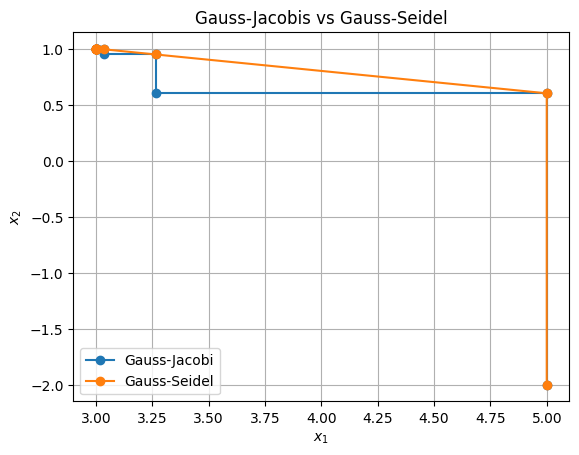

In [48]:
import numpy as np  
import matplotlib.pyplot as plt

tray_jacobi = np.squeeze(np.array(tray_jacobi))
tray_seidel = np.squeeze(np.array(tray_seidel)) 
x1_values_j = tray_jacobi[:, 0]
x2_valuesj_j = tray_jacobi[:, 1]   
x3_values_j = tray_seidel[:, 0]
x4_valuesj_j = tray_seidel[:, 1]

# Graficar la relación entre x1 y x2
plt.plot(x1_values_j, x2_valuesj_j, marker='o', label="Gauss-Jacobi", linestyle='-')
plt.plot(x3_values_j, x4_valuesj_j, marker='o', label="Gauss-Seidel", linestyle='-')


# Personalizar la gráfica
plt.title("Gauss-Jacobis vs Gauss-Seidel")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()
plt.legend()  
plt.show()

## SIN CONVERGENCIA
### METODO DE GAUSS-JACOBI con X0=(1,1)

In [51]:
A = [[2,10],[3,2]]
b = np.array([16,11],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x, tray_jacobi = gauss_jacobi(A=A, b=b, x0=(1,1), tol=tol, max_iter=max_iter)

[01-25 20:43:46][INFO] i= 0 x: [[1. 1.]]
[01-25 20:43:46][INFO] i= 1 x: [[3. 4.]]
[01-25 20:43:46][INFO] i= 2 x: [[-12.   1.]]
[01-25 20:43:46][INFO] i= 3 x: [[ 3.  23.5]]
[01-25 20:43:46][INFO] i= 4 x: [[-109.5    1. ]]
[01-25 20:43:46][INFO] i= 5 x: [[  3.   169.75]]
[01-25 20:43:46][INFO] i= 6 x: [[-840.75    1.  ]]
[01-25 20:43:46][INFO] i= 7 x: [[   3.    1266.625]]
[01-25 20:43:46][INFO] i= 8 x: [[-6.325125e+03  1.000000e+00]]
[01-25 20:43:46][INFO] i= 9 x: [[3.0000000e+00 9.4931875e+03]]
[01-25 20:43:46][INFO] i= 10 x: [[-4.74579375e+04  1.00000000e+00]]
[01-25 20:43:46][INFO] i= 11 x: [[3.00000000e+00 7.11924062e+04]]
[01-25 20:43:46][INFO] i= 12 x: [[-3.55954031e+05  1.00000000e+00]]
[01-25 20:43:46][INFO] i= 13 x: [[3.00000000e+00 5.33936547e+05]]
[01-25 20:43:46][INFO] i= 14 x: [[-2.66967473e+06  1.00000000e+00]]
[01-25 20:43:46][INFO] i= 15 x: [[3.0000000e+00 4.0045176e+06]]
[01-25 20:43:46][INFO] i= 16 x: [[-2.002258e+07  1.000000e+00]]
[01-25 20:43:46][INFO] i= 17 x: [[3.

### METODO DE GAUSS-SEIDEL con X0=(1,1)

In [54]:
A = [[2,10],[3,2]]
b = np.array([16,11],dtype=float)
x0=np.zeros(len(b))
max_iter = 100
tol = 10e-10

x, tray_seidel = gauss_seidel(A=A, b=b, x0=(1,1), tol=tol, max_iter=max_iter)

[01-25 20:46:05][INFO] i= 0 x: [[1. 1.]]
[01-25 20:46:05][INFO] i= 1 x: [[3. 1.]]


### GRAFICAR sin CONVERGENCIA

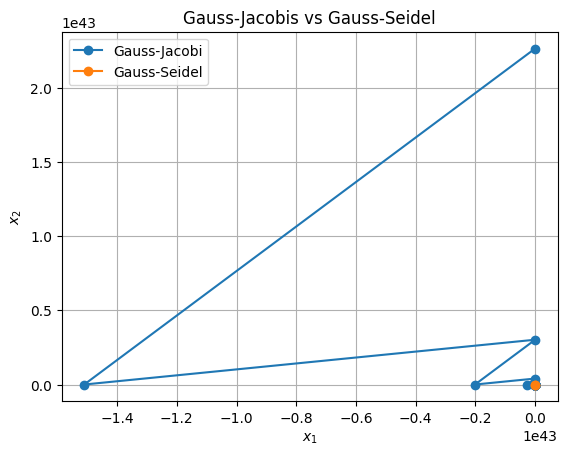

In [55]:
import numpy as np  
import matplotlib.pyplot as plt

tray_jacobi = np.squeeze(np.array(tray_jacobi))
tray_seidel = np.squeeze(np.array(tray_seidel)) 
x1_values_j = tray_jacobi[:, 0]
x2_valuesj_j = tray_jacobi[:, 1]   
x3_values_j = tray_seidel[:, 0]
x4_valuesj_j = tray_seidel[:, 1]

# Graficar la relación entre x1 y x2
plt.plot(x1_values_j, x2_valuesj_j, marker='o', label="Gauss-Jacobi", linestyle='-')
plt.plot(x3_values_j, x4_valuesj_j, marker='o', label="Gauss-Seidel", linestyle='-')


# Personalizar la gráfica
plt.title("Gauss-Jacobis vs Gauss-Seidel")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()
plt.legend()  
plt.show()